# Toolik Station Air Temperature (1988-2021)

**Data:** Shaver, G. 2019. A multi-year DAILY weather file for the Toolik Field Station at Toolik Lake, AK starting 1988 to present. ver 4. Environmental Data Initiative. [Link](https://doi.org/10.6073/pasta/ce0f300cdf87ec002909012abefd9c5c) (Accessed 2021-08-08).

The data are stored in the `data` subfolder. We'll use the relative path to point to it and read it in using `pandas`.

In [23]:
# Import the libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for nicer plots
import re # regular expressions

# Read the data
toolik_weather = pd.read_csv(
    # Path to the data
    "../data/toolik_weather.csv",
    # not a number values are "#N/A"
    na_values="#N/A"
    )


- First: Look at the data you've read in (always always)

- Second: Check for any issues in the data

- Third: Ensure all missing values are handled

## Basic exploration

### An overview

In [24]:
# Inspect the data
toolik_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             11171 non-null  int64  
 1   Month                            11171 non-null  int64  
 2   Date                             11171 non-null  int64  
 3   LTER_Site                        11171 non-null  object 
 4   Station                          11171 non-null  object 
 5   Daily_AirTemp_Mean_C             11171 non-null  float64
 6   Flag_Daily_AirTemp_Mean_C        1310 non-null   object 
 7   Daily_AirTemp_AbsMax_C           11001 non-null  float64
 8   Flag_Daily_AirTemp_AbsMax_C      1020 non-null   object 
 9   Daily_AirTemp_AbsMin_C           10967 non-null  float64
 10  Flag_Daily_AirTemp_AbsMin_C      1236 non-null   object 
 11  Daily_Precip_Total_mm            10751 non-null  float64
 12  Flag_Daily_Precip_

### A few other things to explore

In [25]:
# Inspect the data
print(toolik_weather.shape)
print(toolik_weather.columns)

(11171, 21)
Index(['Year', 'Month', 'Date', 'LTER_Site', 'Station', 'Daily_AirTemp_Mean_C',
       'Flag_Daily_AirTemp_Mean_C', 'Daily_AirTemp_AbsMax_C',
       'Flag_Daily_AirTemp_AbsMax_C', 'Daily_AirTemp_AbsMin_C',
       'Flag_Daily_AirTemp_AbsMin_C', 'Daily_Precip_Total_mm',
       'Flag_Daily_Precip_Total_mm', 'Daily_windsp_mean_msec',
       'FLAG_Daily_windsp_mean_msec', 'Daily_Windspeed_AbsMax_m_s',
       'Daily_globalrad_total_jcm2', 'FLAG_Daily_globalrad_total_mjm2', 'Moss',
       'Soil20cm', 'Comments'],
      dtype='object')


## One awesome cleaning tool: `python`

We can use a simple python function and regular expressions
to clean up column names.

In [26]:
def snakecase(s):
        """Convert CamelCase to snake_case and lowercase the string
        s: string
        """
        s = re.sub(
                 # Find a lower case letter (or number) (group 1)
                 # followed by an upper case letter (group 2)
                '([a-z0-9])([A-Z])',
                # Replace with the lower case letter (\1), 
                # an underscore, 
                # and the upper case letter (\2)
                r'\1_\2', 
                s # In the string 
                )
        s = re.sub(
                ' ', # Find a space
                '_', # Replace with an underscore
                s    # In the string
                ).lower()  # Convert to lower case
        return s

print(snakecase("HelloWorld"))

hello_world


In [27]:

toolik_weather.columns = [
    # Replace spaces with underscores and lowercase labels
    # for each col in toolik_weather.columns
    snakecase(col) for col in toolik_weather.columns
]

# Check the cleaned column names
toolik_weather.columns

Index(['year', 'month', 'date', 'lter_site', 'station',
       'daily_air_temp_mean_c', 'flag_daily_air_temp_mean_c',
       'daily_air_temp_abs_max_c', 'flag_daily_air_temp_abs_max_c',
       'daily_air_temp_abs_min_c', 'flag_daily_air_temp_abs_min_c',
       'daily_precip_total_mm', 'flag_daily_precip_total_mm',
       'daily_windsp_mean_msec', 'flag_daily_windsp_mean_msec',
       'daily_windspeed_abs_max_m_s', 'daily_globalrad_total_jcm2',
       'flag_daily_globalrad_total_mjm2', 'moss', 'soil20cm', 'comments'],
      dtype='object')


## Make a graph

Let's make a jitterplot of temperatures by month.


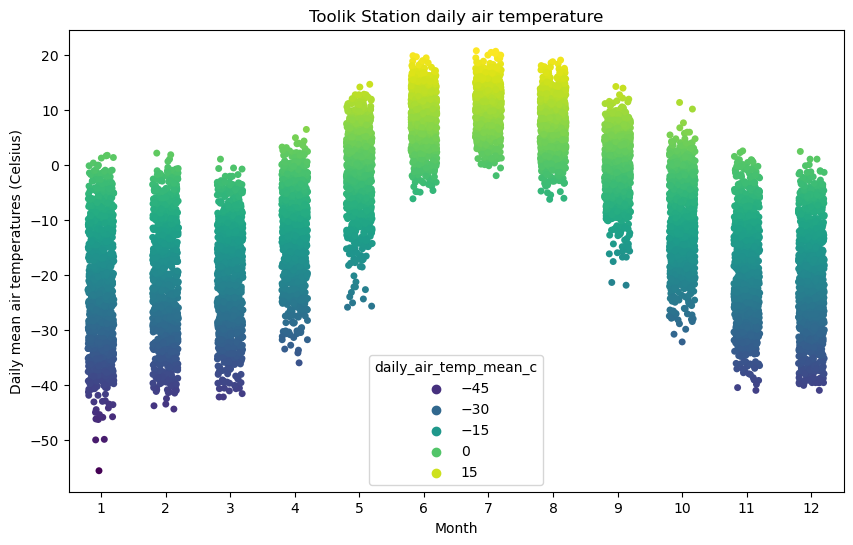

In [28]:
plt.figure(figsize=(10, 6)) # This command sets the size of the figure

sns.stripplot( # This command creates the plot
    # The data argument sets the data that will be used to create
    # the plot. In this case, the data is the toolik_weather data
    # frame.
    data=toolik_weather, 
    # The next two arguments set the x and y axes. In this case,
    # the x axis is set to the month column and the y axis is set
    # to the daily air temperature column.
    x='month', 
    y='daily_air_temp_mean_c', 
    jitter=0.2, # This sets the jitter of the points on the x axis
    # The hue argument sets the color of the points. In this case, 
    # the color is set by the daily air temperature.
    hue='daily_air_temp_mean_c', 
    # This sets the color palette, which is a set of colors that
    # will be used to color the points. In this case, the palette
    # is set to the viridis palette, which is a colorblind-friendly
    # palette.
    palette='viridis' 
)

# This command sets the title of the plot
plt.title("Toolik Station daily air temperature")
# This command sets the x axis label
plt.xlabel("Month")
# This command sets the y axis label
plt.ylabel("Daily mean air temperatures (Celsius)")

# Finally, this command shows the plot in the notebook
plt.show()


## Export a figure

FileNotFoundError: [Errno 2] No such file or directory: 'figs/toolik_temp_plot.png'

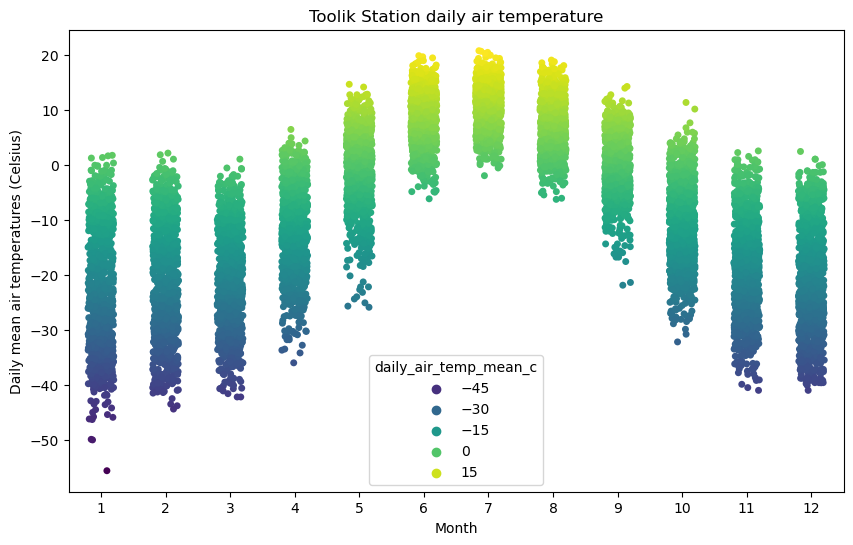

In [29]:
# These commands are the same as above, but they save the plot
# to a file instead of showing it in the notebook.
fig = plt.figure(figsize=(10, 6))
sns.stripplot(
    data=toolik_weather, 
    x='month', y='daily_air_temp_mean_c', 
    jitter=0.2, 
    hue='daily_air_temp_mean_c', 
    palette='viridis'
)
plt.title("Toolik Station daily air temperature")
plt.xlabel("Month")
plt.ylabel("Daily mean air temperatures (Celsius)")

# This command saves the plot to a file. The dpi argument sets
# the resolution of the figure.
fig.savefig("figs/toolik_temp_plot.png", dpi=300)



Now try changing something about the plot code and re-run the export code. Does your saved figure change? Great!

## End Example 1
